**Análisis Exploratorio Datos**

*   Angel Luis Parra Marcos


In [1]:
import pandas as pd
import numpy as np
import os
import plotnine as pn
from plotnine import *
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
propiedades = pd.read_csv('propiedades_clean.csv')

propiedades

proptype        taxkey                  address  district  nbhd  \
0       Commercial  3.230461e+09            2628 N 6TH ST       6.0  6258   
1       Commercial  3.590192e+09       1363 N PROSPECT AV       3.0  6262   
2       Commercial  4.161194e+09            617 S 94TH ST      10.0  6272   
3       Commercial  1.719836e+09  3624 W SILVER SPRING DR       1.0  6218   
4       Commercial  3.480290e+09         3830 W LISBON AV      15.0  6254   
...            ...           ...                      ...       ...   ...   
59925  Condominium  7.160339e+09          1912 W SALEM ST      13.0  5360   
59926  Condominium  7.160351e+09           6316 S 20TH ST      13.0  5360   
59927  Condominium  7.160365e+09           6376 S 20TH ST      13.0  5360   
59928  Condominium  7.160366e+09           6378 S 20TH ST      13.0  5360   
59929  Condominium  7.160375e+09           6354 S 20TH ST      13.0  5360   

                                style  stories  year_built  rooms  \
0                   commercial exempt        2      1880.0      0   
1      mansions with commercial usage        2      1876.0      0   
2                    service building        1      1954.0      0   
3                          store bldg        2      1955.0      0   
4                          store bldg        2      1909.0      0   
...                               ...      ...         ...    ...   
59925            low rise 1-3 stories        2      1974.0     10   
59926            low rise 1-3 stories        1      1974.0      5   
59927            low rise 1-3 stories        2      1974.0     10   
59928            low rise 1-3 stories        2      1974.0      5   
59929            low rise 1-3 stories        1      1974.0      5   

       finishedsqft  units  bdrms  fbath  hbath  lotsize   sale_date  \
0            1840.0    1.0      0      0      0  12750.0  2002-01-01   
1            4174.0    1.0      0      0      0  11840.0  2002-01-01   
2            4174.0    1.0      0      0      0   9700.0  2002-01-01   
3            4174.0    1.0      0      0      0   8792.0  2002-01-01   
4            4174.0    1.0      0      0      0   4840.0  2002-01-01   
...             ...    ...    ...    ...    ...      ...         ...   
59925        1100.0    1.0      4      1      1      1.0  2022-03-11   
59926        1379.0    1.0      2      1      1      1.0  2022-10-28   
59927        1100.0    1.0      4      1      1      1.0  2022-03-15   
59928        1100.0    1.0      2      1      1      1.0  2022-12-30   
59929        1141.0    1.0      2      1      1      1.0  2022-07-08   

       sale_price  age_at_sale  
0         45000.0        122.0  
1        465000.0        126.0  
2        119000.0         48.0  
3        210000.0         47.0  
4         48500.0         93.0  
...           ...          ...  
59925    125900.0         48.0  
59926    150000.0         48.0  
59927    130000.0         48.0  
59928    123000.0         48.0  
59929    157500.0         48.0  

[59930 rows x 18 columns]

In [3]:
propiedades.isnull().sum()

proptype        0
taxkey          0
address         0
district        0
nbhd            0
style           1
stories         0
year_built      0
rooms           0
finishedsqft    0
units           0
bdrms           0
fbath           0
hbath           0
lotsize         0
sale_date       0
sale_price      0
age_at_sale     0
dtype: int64

In [4]:
propiedades.loc[propiedades['style'].isnull()]

proptype       taxkey            address  district  nbhd style  \
15562  Condominium  430499000.0  7828 W HEATHER AV       9.0  5069   NaN   

       stories  year_built  rooms  finishedsqft  units  bdrms  fbath  hbath  \
15562        2      1978.0      6        1508.0    1.0      2      2      0   

       lotsize   sale_date  sale_price  age_at_sale  
15562      0.0  2014-11-01     45000.0         36.0

In [5]:
propiedades = propiedades[~propiedades['style'].isnull()]

**SE ELIMINA UN REGISTRO DE LOS 59930 REGISTROS POR SER NULO EN STYLE**

In [6]:
propiedades.isnull().sum()

proptype        0
taxkey          0
address         0
district        0
nbhd            0
style           0
stories         0
year_built      0
rooms           0
finishedsqft    0
units           0
bdrms           0
fbath           0
hbath           0
lotsize         0
sale_date       0
sale_price      0
age_at_sale     0
dtype: int64

In [7]:
propiedades.shape

(59929, 18)

# Insight:  Distribución de precios de venta por tipo de propiedad.

Vemos un análisis de los precios de venta para los diferentes tipos de propiedades, observando las diferencias significativas entre de precios entre los  diferentes tipos.

-Las **propiedades comerciales y los apartamentos grandes tienen los rangos de precios más amplios y mayores valores máximos.**

-Las **propiedades residenciales y los condominios tienen precios medianos más bajos comparados con las propiedades comerciales   y apartamentos grandes.**

-Las **propiedades de manufactura tienen una distribución de precios muy concentrada en el extremo superior del rango.**

-Las **propiedades exentas tienen el rango de precios más estrecho, con una mediana más baja comparada con las propiedades         comerciales y apartamentos grandes.**

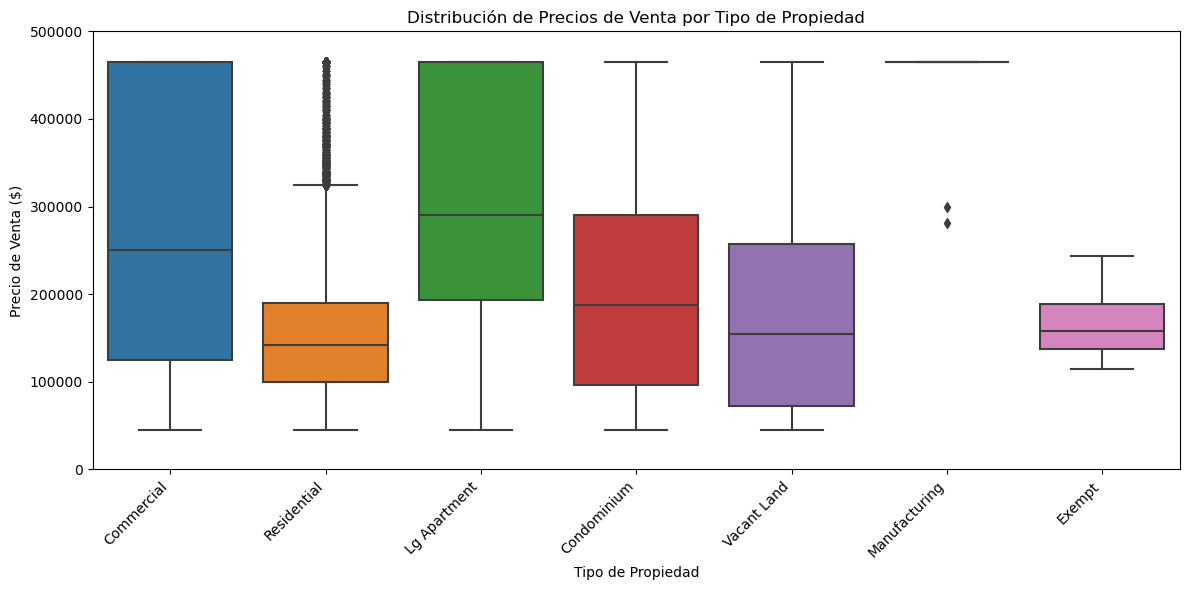

In [8]:

plt.figure(figsize=(12, 6))  
sns.boxplot(x='proptype', y='sale_price', data=propiedades)
plt.title('Distribución de Precios de Venta por Tipo de Propiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Precio de Venta ($)')
plt.ylim(0, 500000)  
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()  
plt.show()


# **Insight: Análisis de los estilos de propiedad más comunes.**

Vemos que  los 10 estilos de propiedad más frecuentes en Milwaukee, siendo **"ranch"el estilo más predominante.**

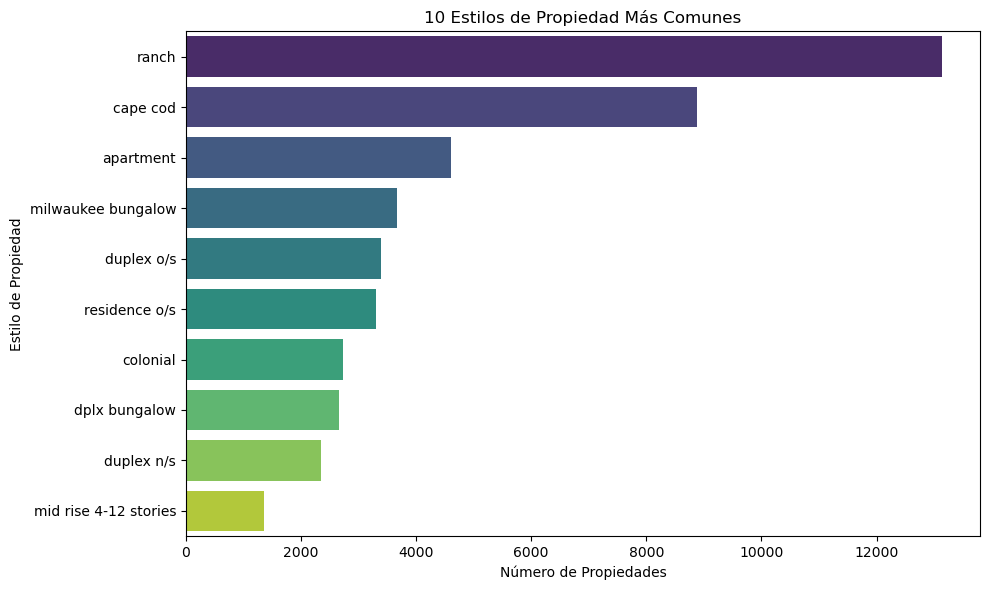

In [9]:
top_styles = propiedades['style'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6)) 
sns.barplot(x=top_styles.values, y=top_styles.index, palette="viridis")  
plt.title('10 Estilos de Propiedad Más Comunes')
plt.xlabel('Número de Propiedades')
plt.ylabel('Estilo de Propiedad')
plt.tight_layout()  
plt.show()

# **Insight: Relación entre el tamaño en pies cuadrados y el precio de venta de los 10 estilos de propiedad más comunes.**



Con los graficos de dispersión de los estilos de propiedad más frecuene  para visualizar la relación entre el tamaño (en pies cuadrados) y el precio de venta, vemos que existe una **correlación positiva entre el tamaño de la propiedad y el precio de venta, aunque con una dispersión considerable, indicando que otros factores también influyen en el precio.**

ranch


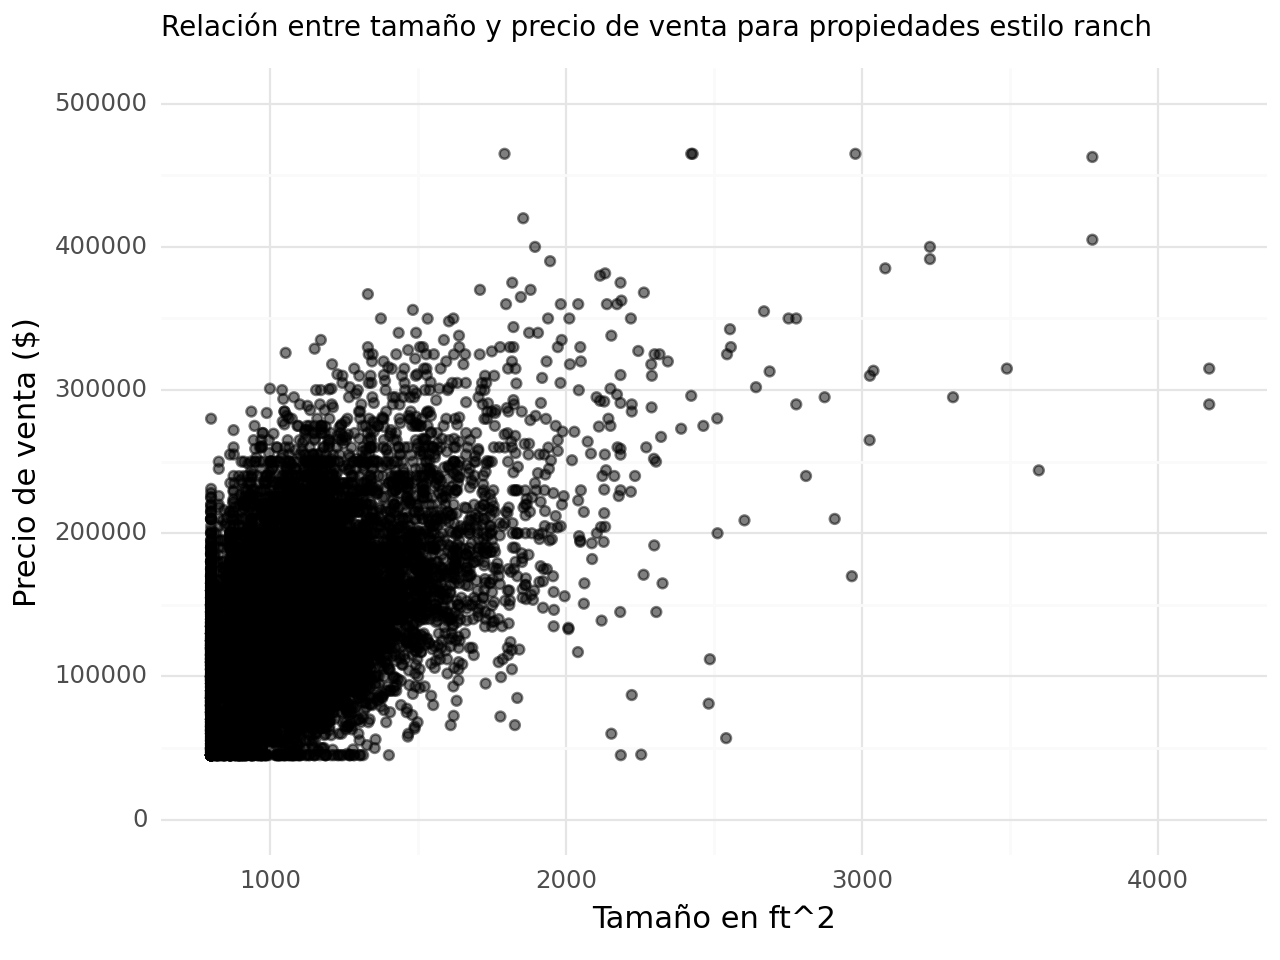


cape cod


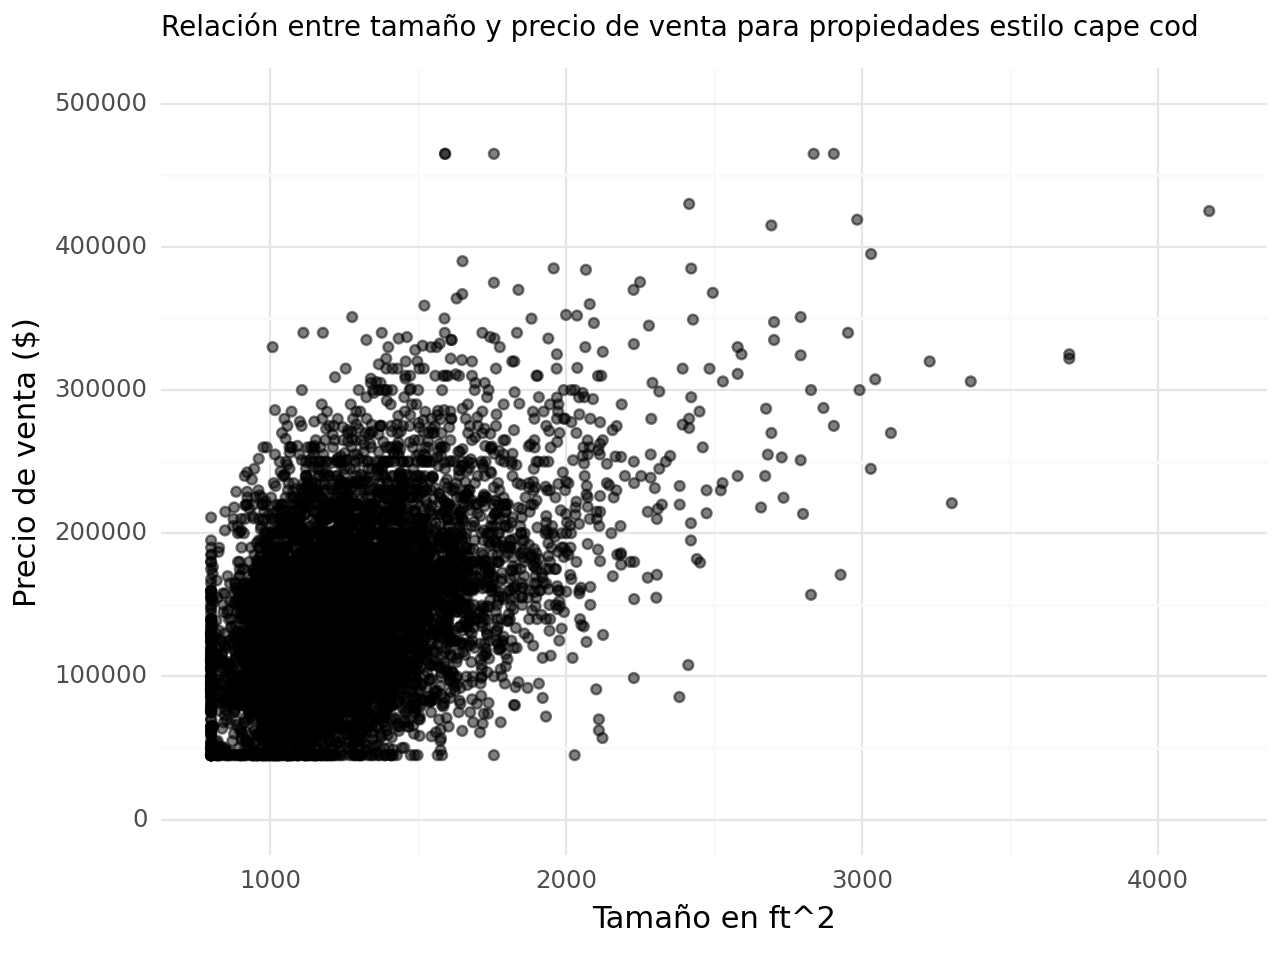


apartment


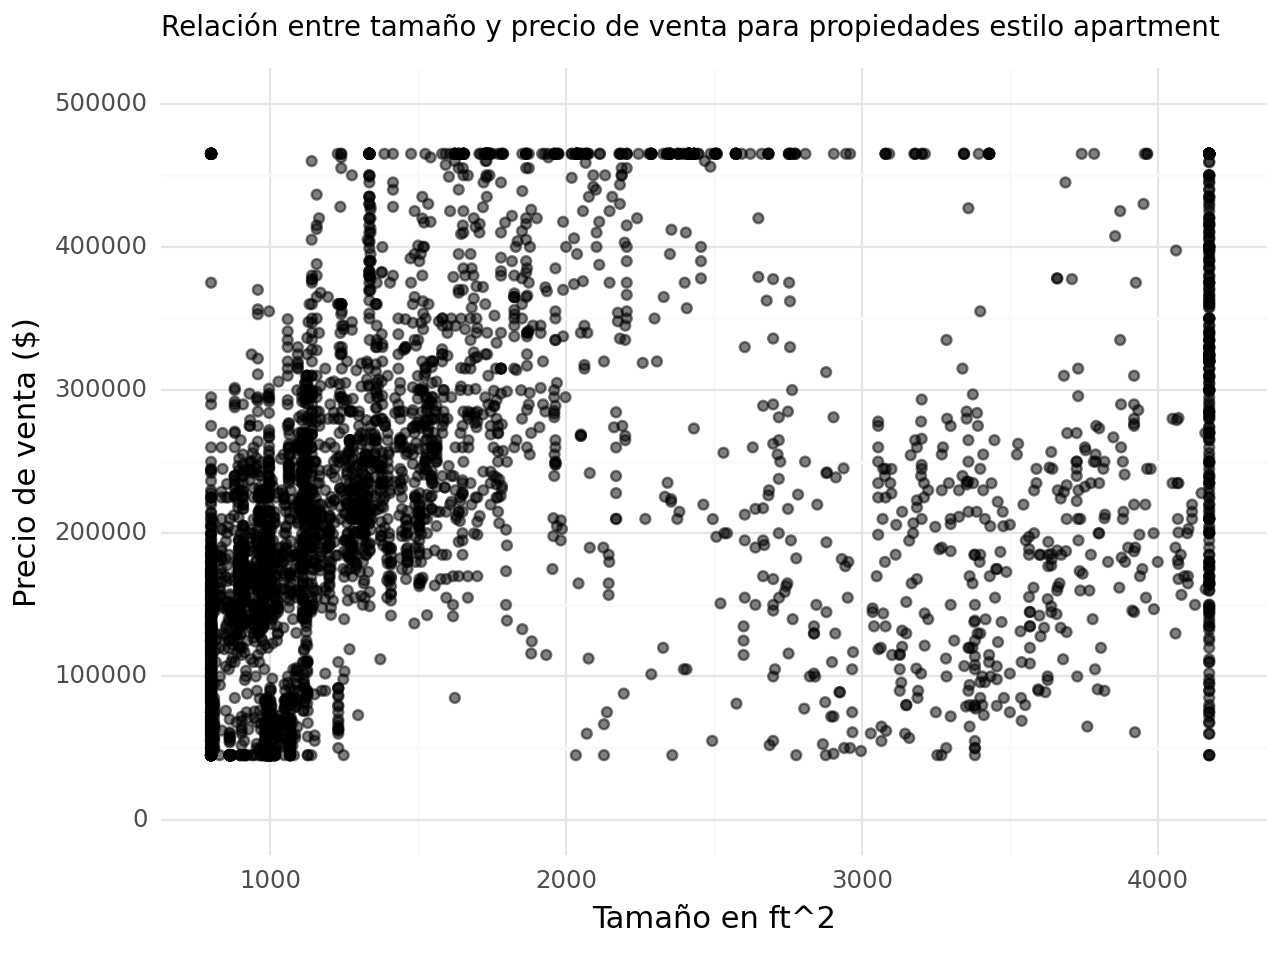


milwaukee bungalow


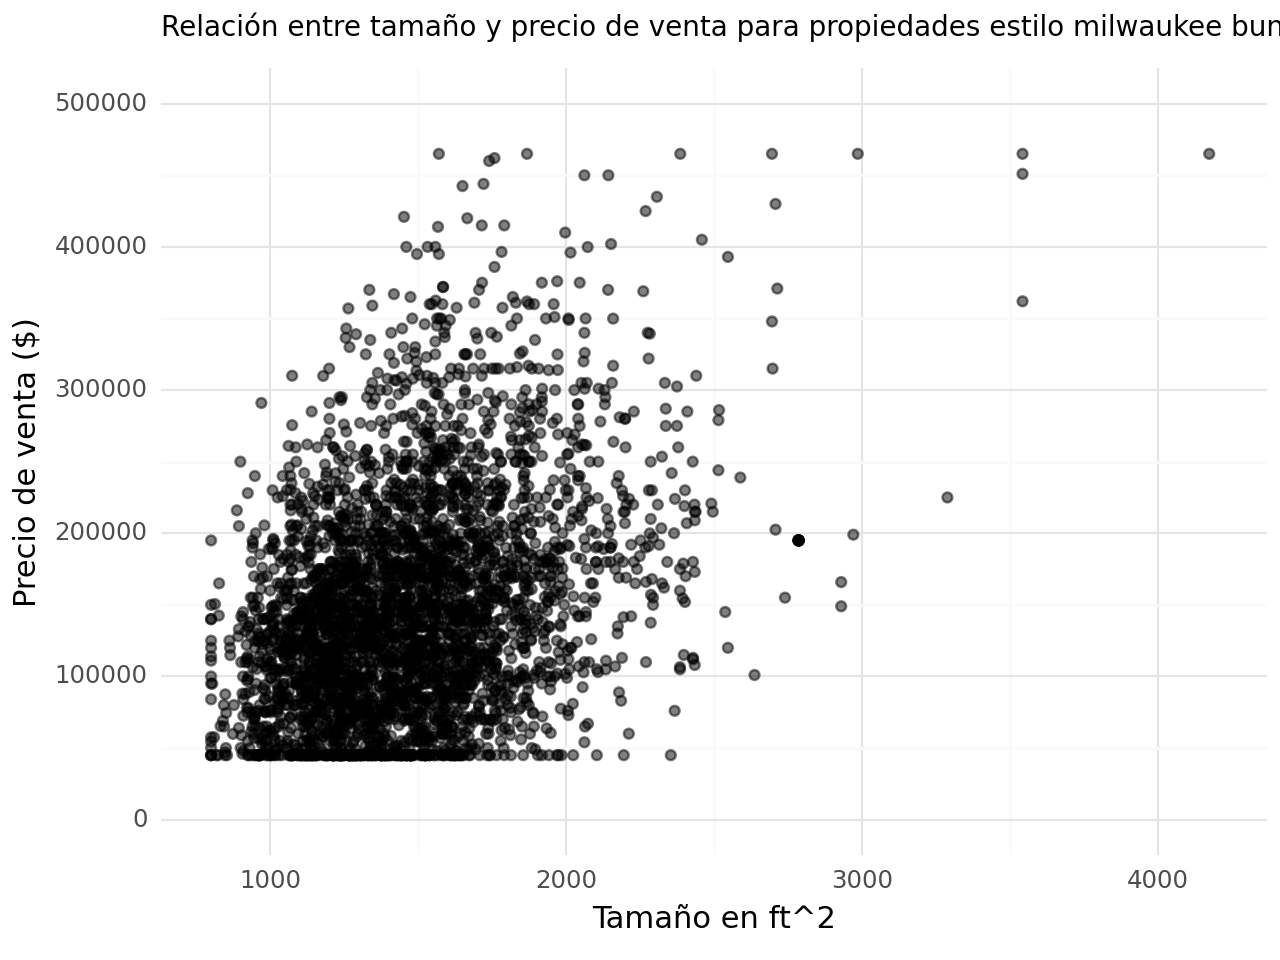


duplex o/s


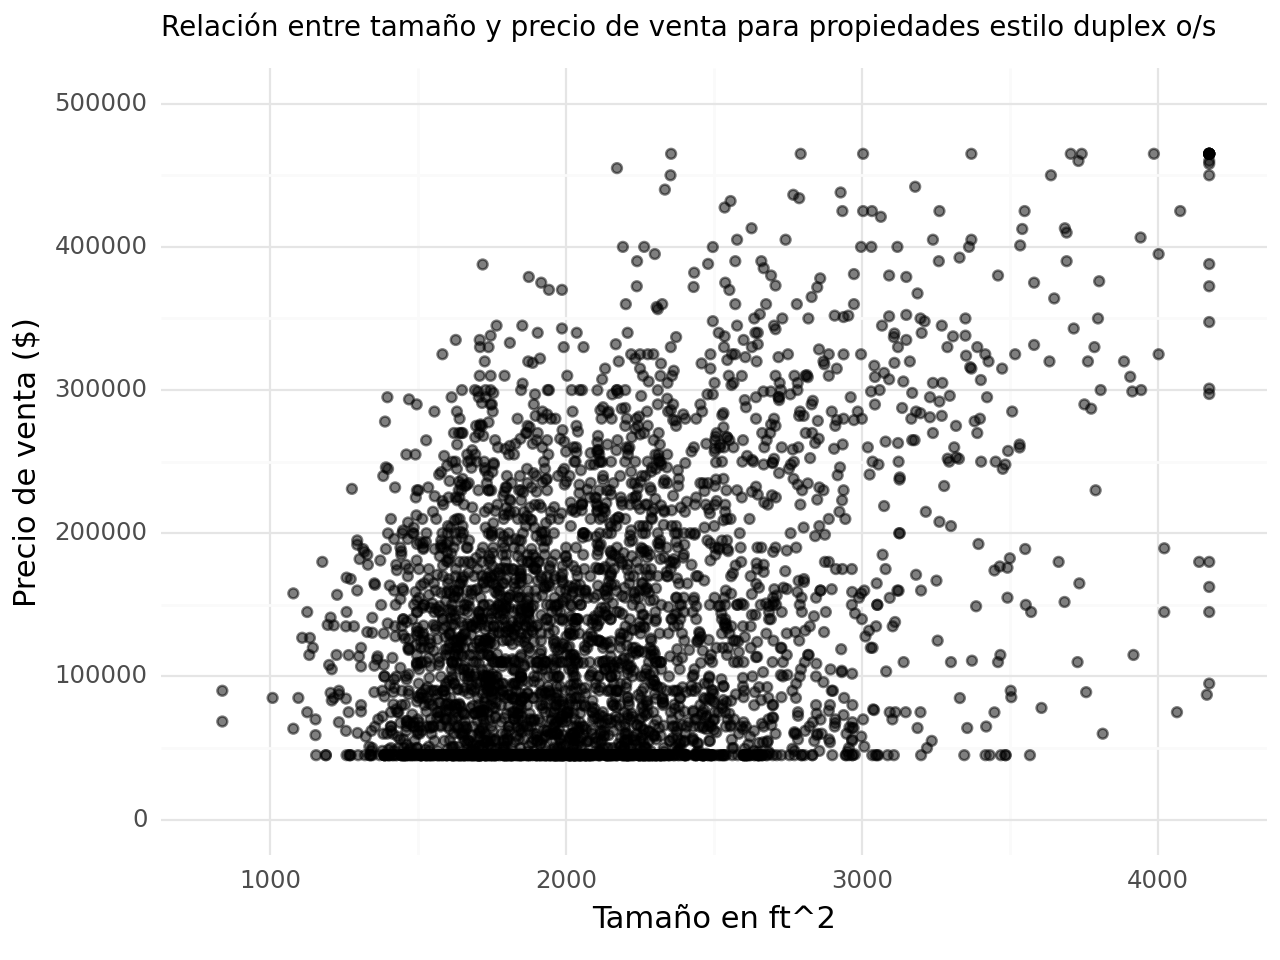


residence o/s


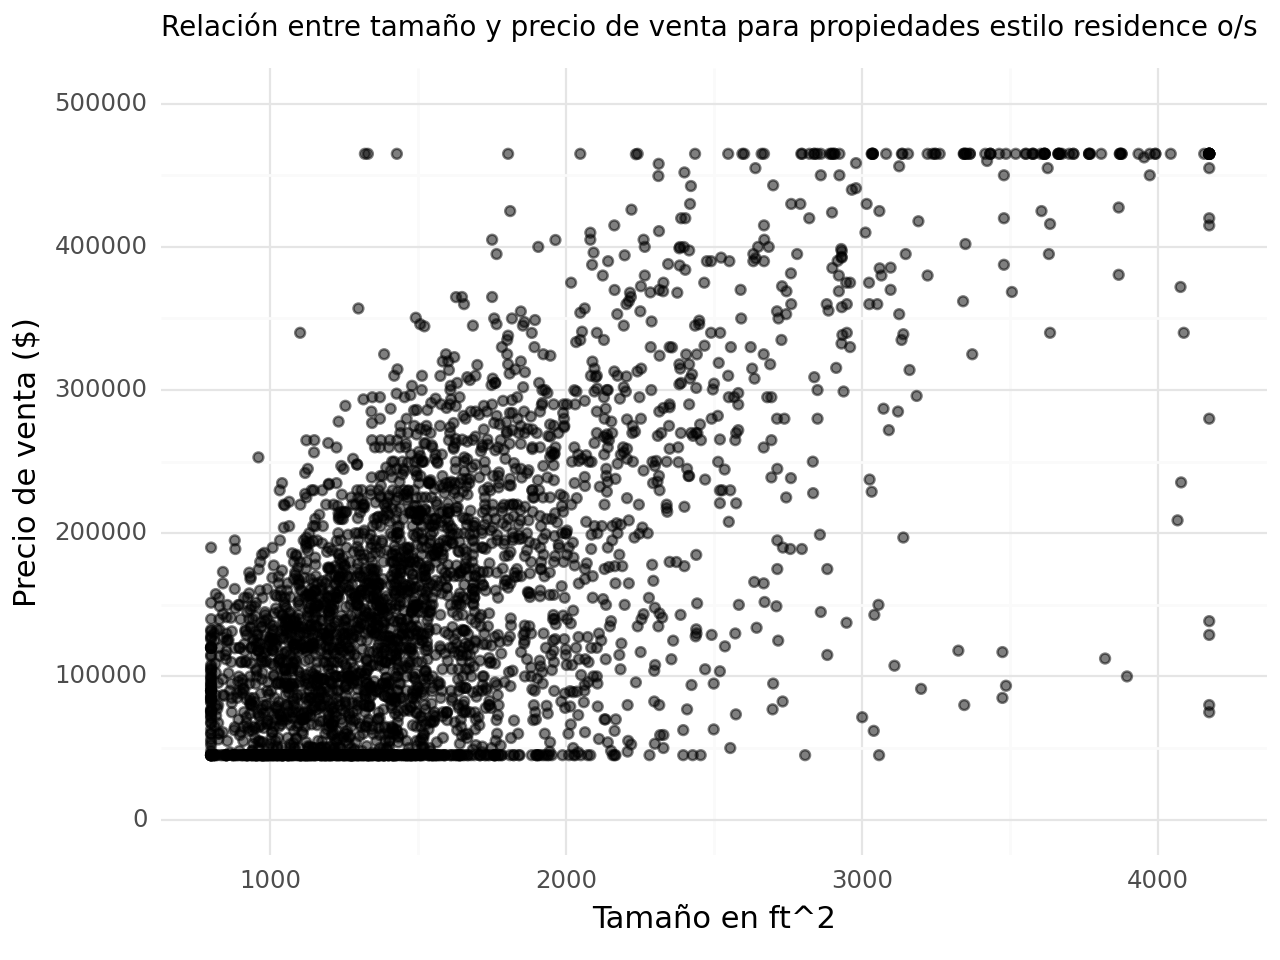


colonial


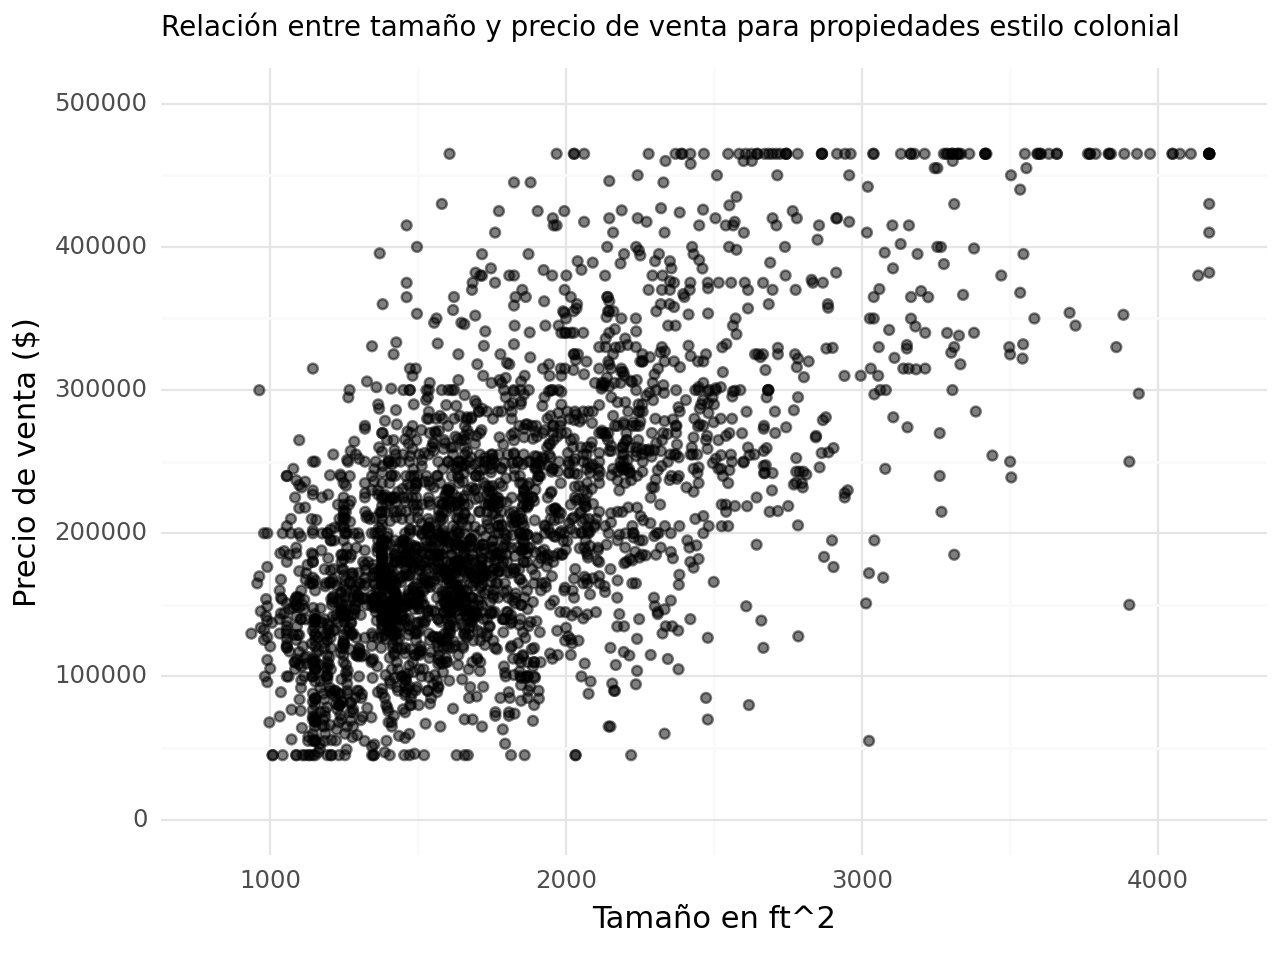


dplx bungalow


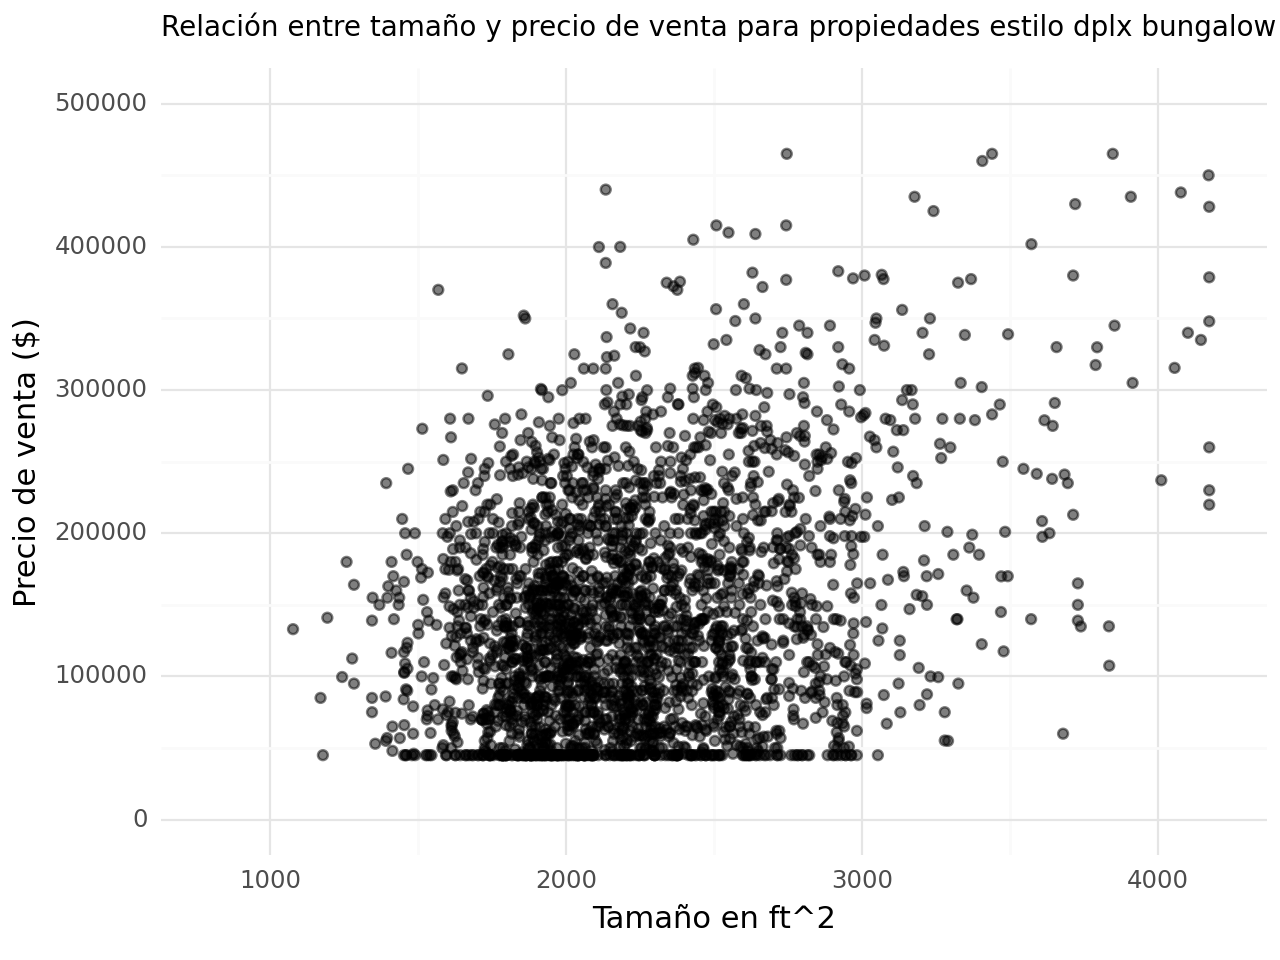


duplex n/s


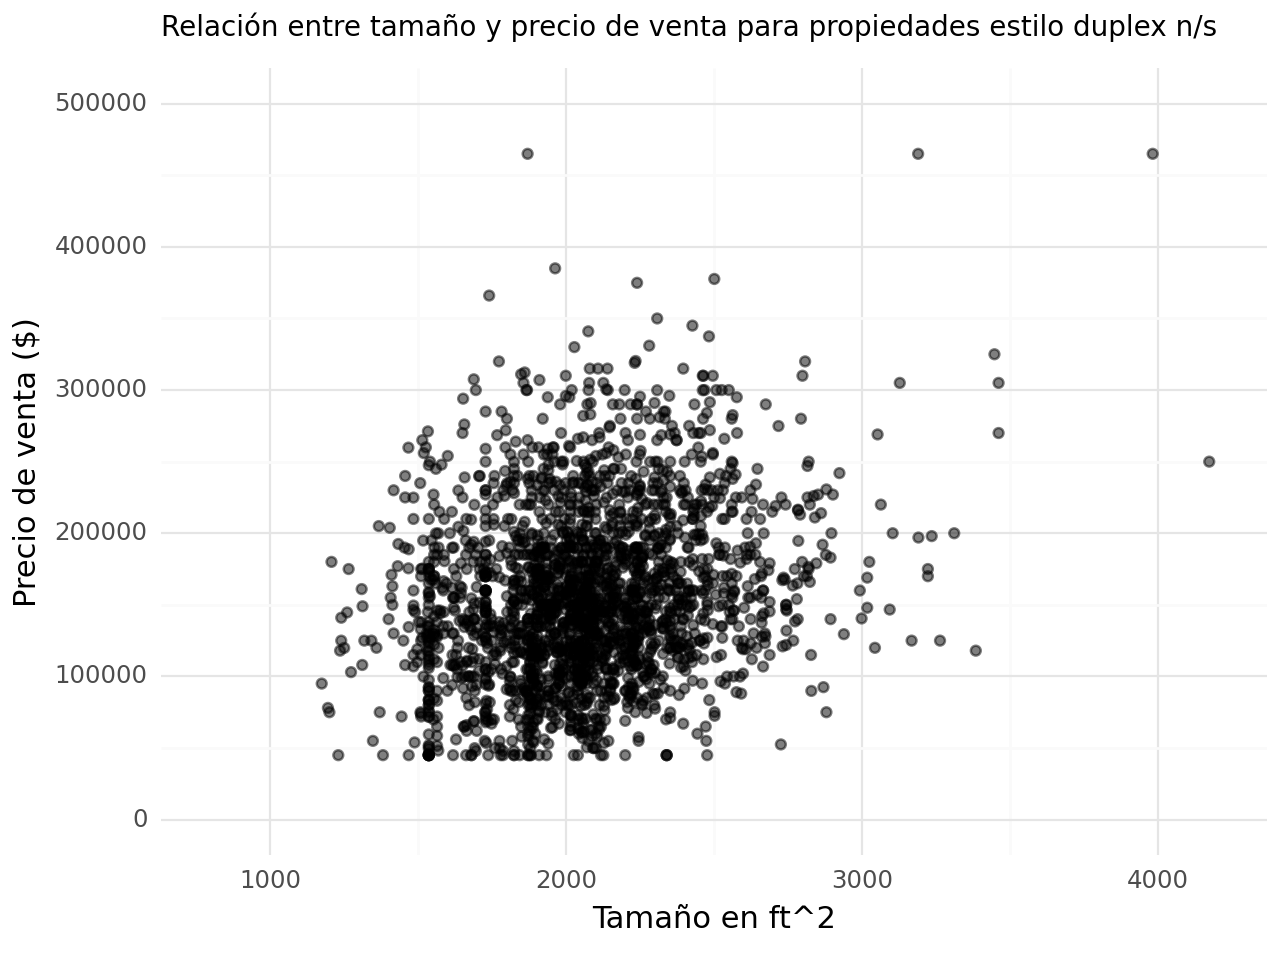


mid rise 4-12 stories


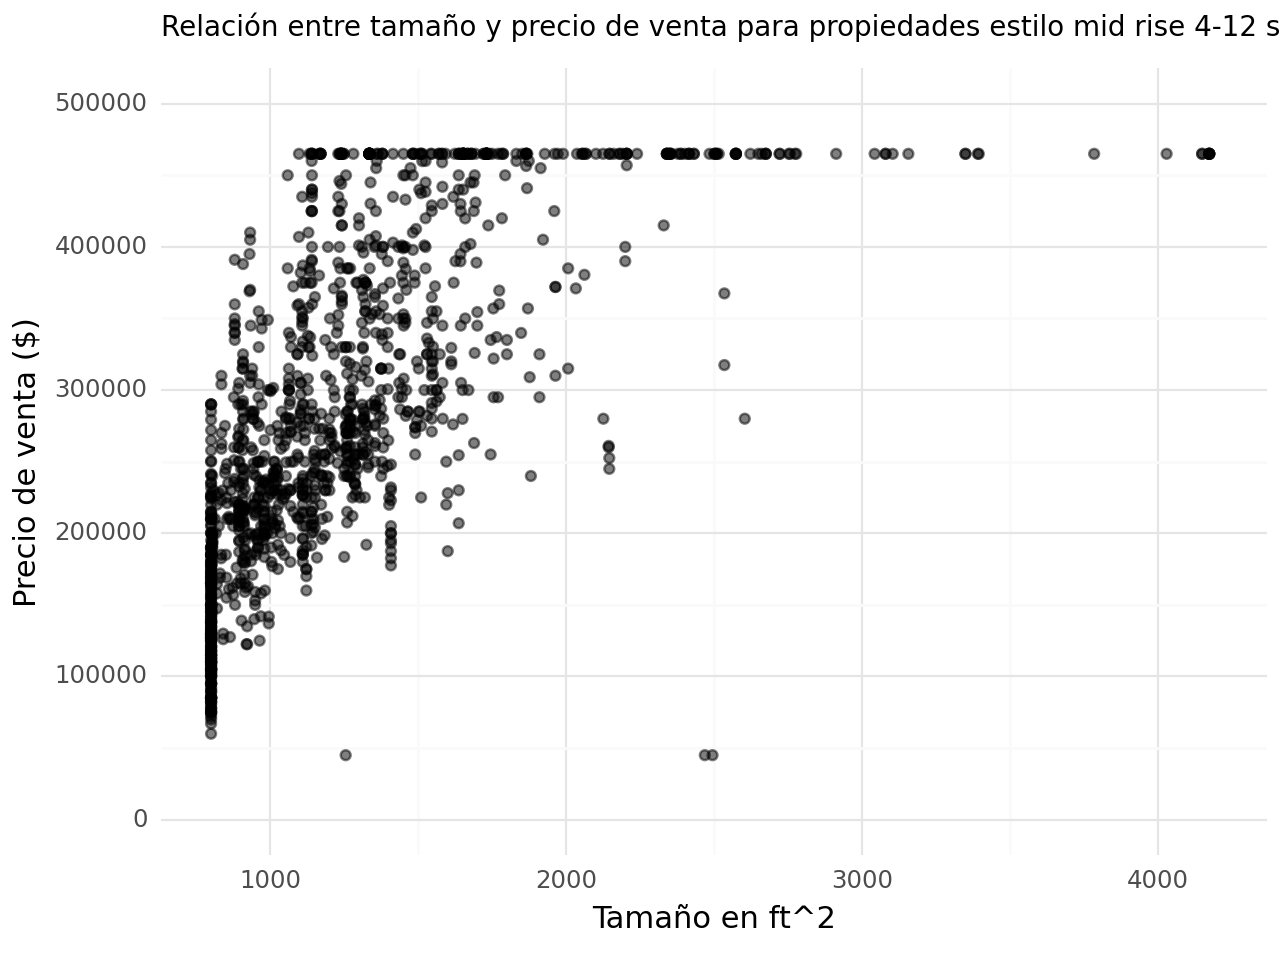

In [10]:
styles = [
    "ranch", "cape cod", "apartment", "milwaukee bungalow", 
    "duplex o/s", "residence o/s", "colonial", 
    "dplx bungalow", "duplex n/s", "mid rise 4-12 stories"
]

for style in styles:
    filtered_df = propiedades[propiedades["style"] == style]

    plot = (
        ggplot(filtered_df, aes(x='finishedsqft', y='sale_price')) +
        geom_point(alpha=0.5) +
        labs(title=f'Relación entre tamaño y precio de venta para propiedades estilo {style}',
             x='Tamaño en ft^2',
             y='Precio de venta ($)') +
        theme_minimal() +
        theme(plot_title=element_text(size=10)) +
        ylim(0, 500000) +  
        xlim(800, 4200)    
    )

    print(style)
    print(plot)

# Insight: El gráfico de densidad muestra la distribución de los años de construcción de las propiedades.

 Vemos que **la mayor concentración de construcciones se encuentra entre los años 1900 y 1975**, con un pico notable alrededor de 1950.
 
**La densidad muestra una disminución significativa después de 1975**, indicando una menor cantidad de propiedades construidas en los años posteriores.
Las valores de la media, mediana y moda son bastante cercanos, lo que sugiere que la distribución de los años de construcción es bastante simétrica alrededor de estos valores.

In [11]:

print(f"Media: {propiedades['year_built'].mean()}")
print(f"Mediana: {propiedades['year_built'].median()}")
moda = propiedades['year_built'].mode()[0]
print(f"Moda: {moda}")

Media: 1944.4298252932638
Mediana: 1950.0
Moda: 1955.0


C:\Users\ankel\AppData\Local\Temp\ipykernel_17784\2190400904.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

C:\Users\ankel\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


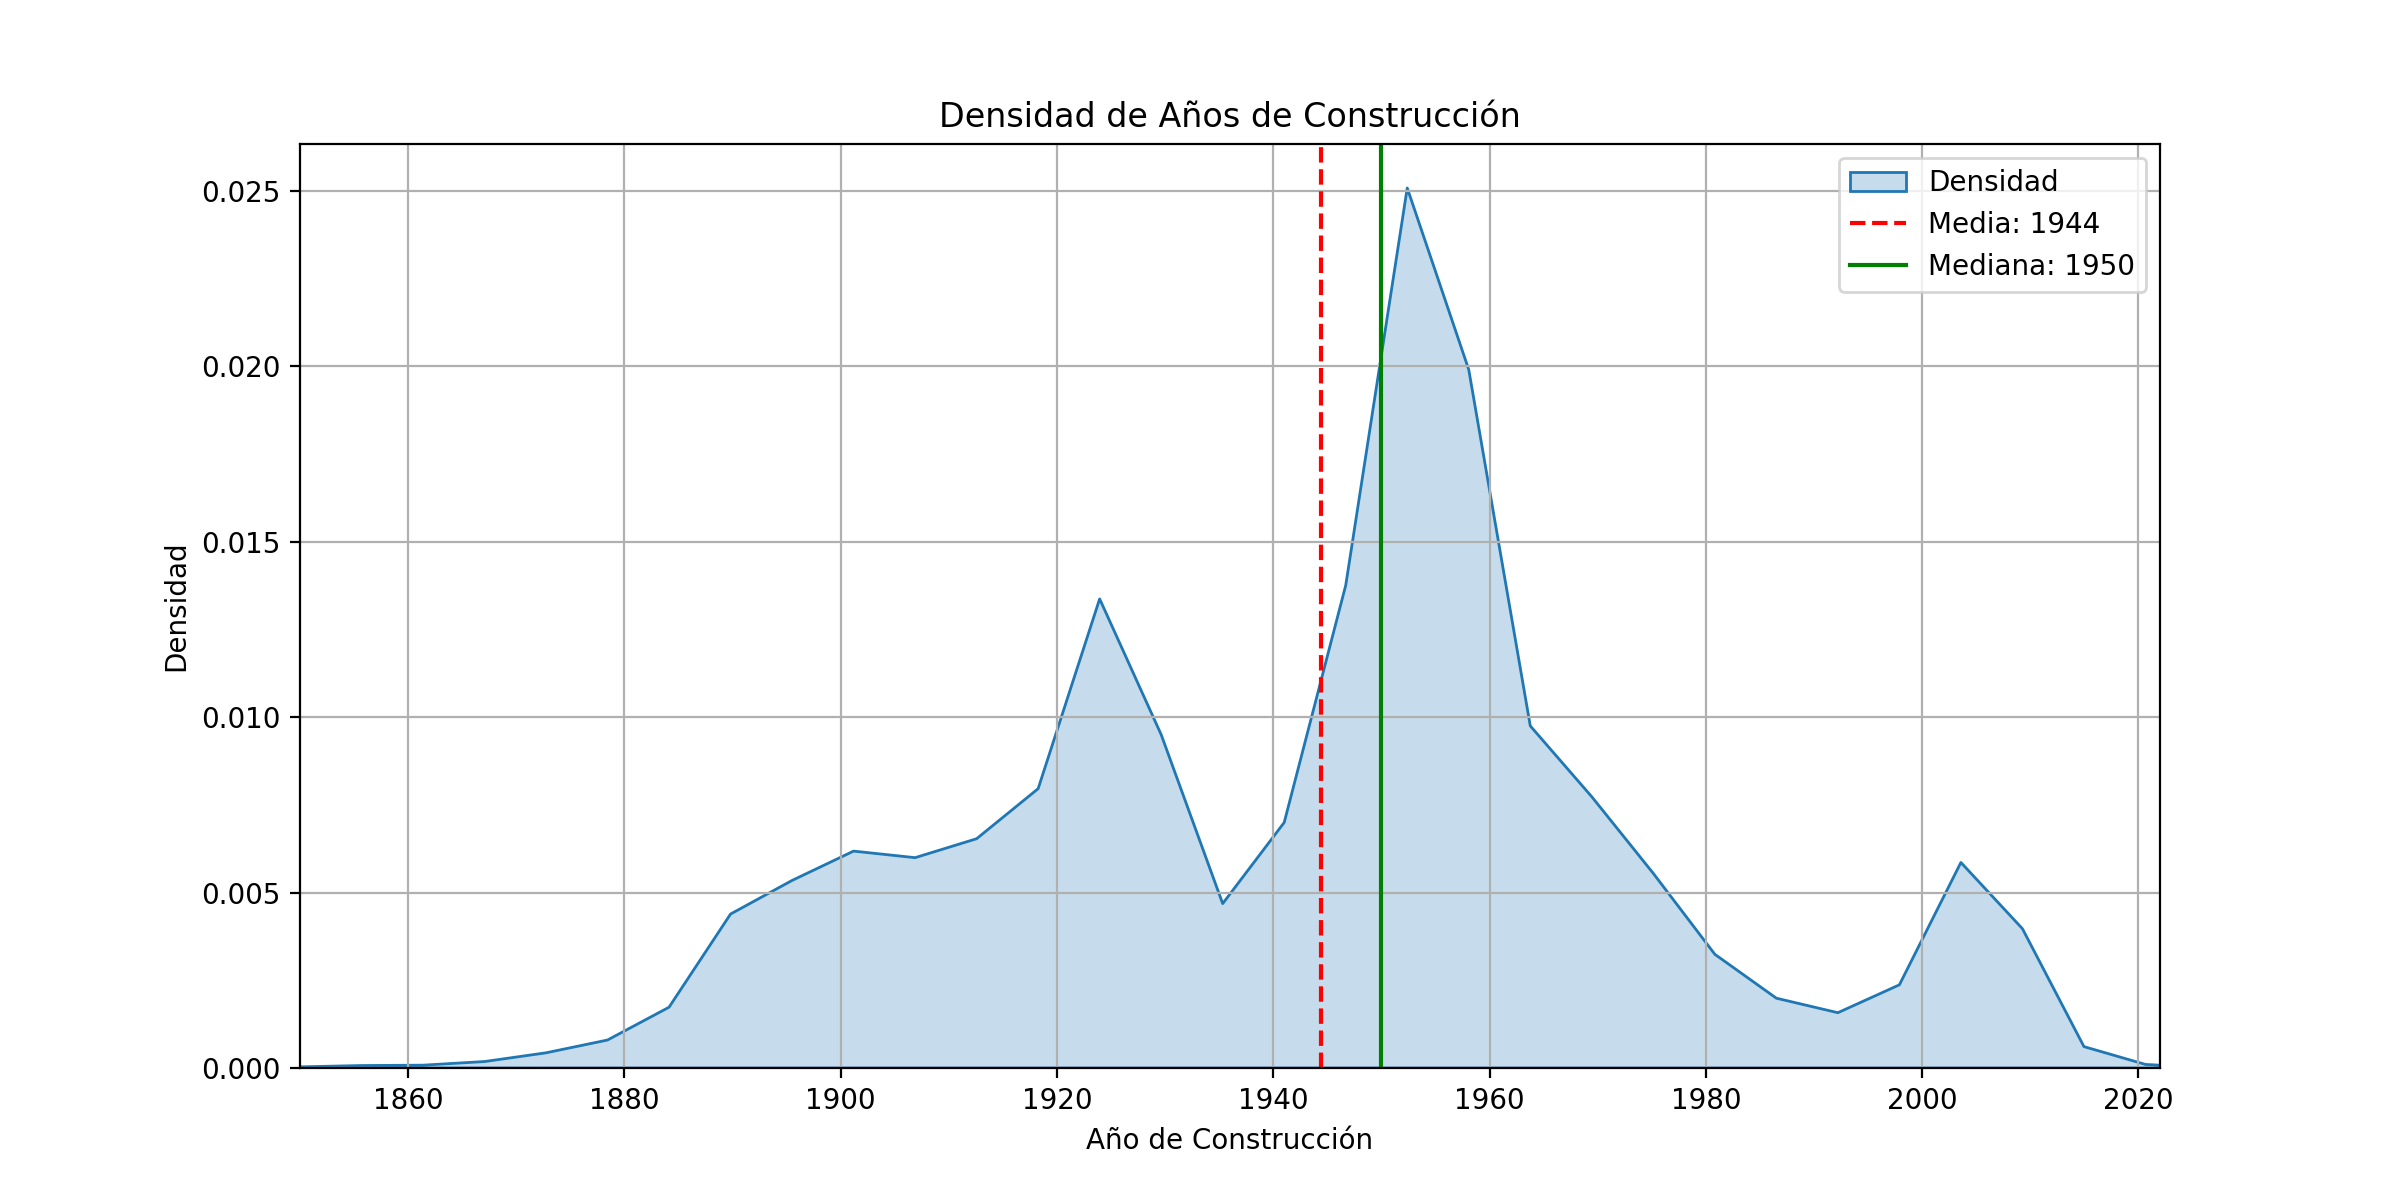

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


year_built_data = propiedades['year_built'].dropna()

mean_year = year_built_data.mean()
median_year = year_built_data.median()

plt.figure(figsize=(12, 6))
sns.kdeplot(year_built_data, shade=True, label='Densidad')
plt.axvline(mean_year, color='r', linestyle='--', label=f'Media: {mean_year:.0f}')
plt.axvline(median_year, color='g', linestyle='-', label=f'Mediana: {median_year:.0f}')
plt.title('Densidad de Años de Construcción')
plt.xlabel('Año de Construcción')
plt.ylabel('Densidad')
plt.xlim(1850, 2022)  
plt.legend()
plt.grid(True)
plt.show()


 # **Insight : Análisis de la evolución de los precios de venta a lo largo del tiempo.**




Podemos observar la **caida que implico la crisis inmobiliaria del 2008 en el precio de venta de las propiedades.**

In [13]:
incorrect_dates = ['2024-09-26', '2028-06-13']
correct_dates = ['2022-09-26', '2022-06-13']

propiedades.loc[propiedades['sale_date'] == incorrect_dates[0], 'sale_date'] = correct_dates[0]
propiedades.loc[propiedades['sale_date'] == incorrect_dates[1], 'sale_date'] = correct_dates[1]


C:\Users\ankel\AppData\Local\Temp\ipykernel_17784\1481246781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ankel\AppData\Local\Temp\ipykernel_17784\1481246781.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


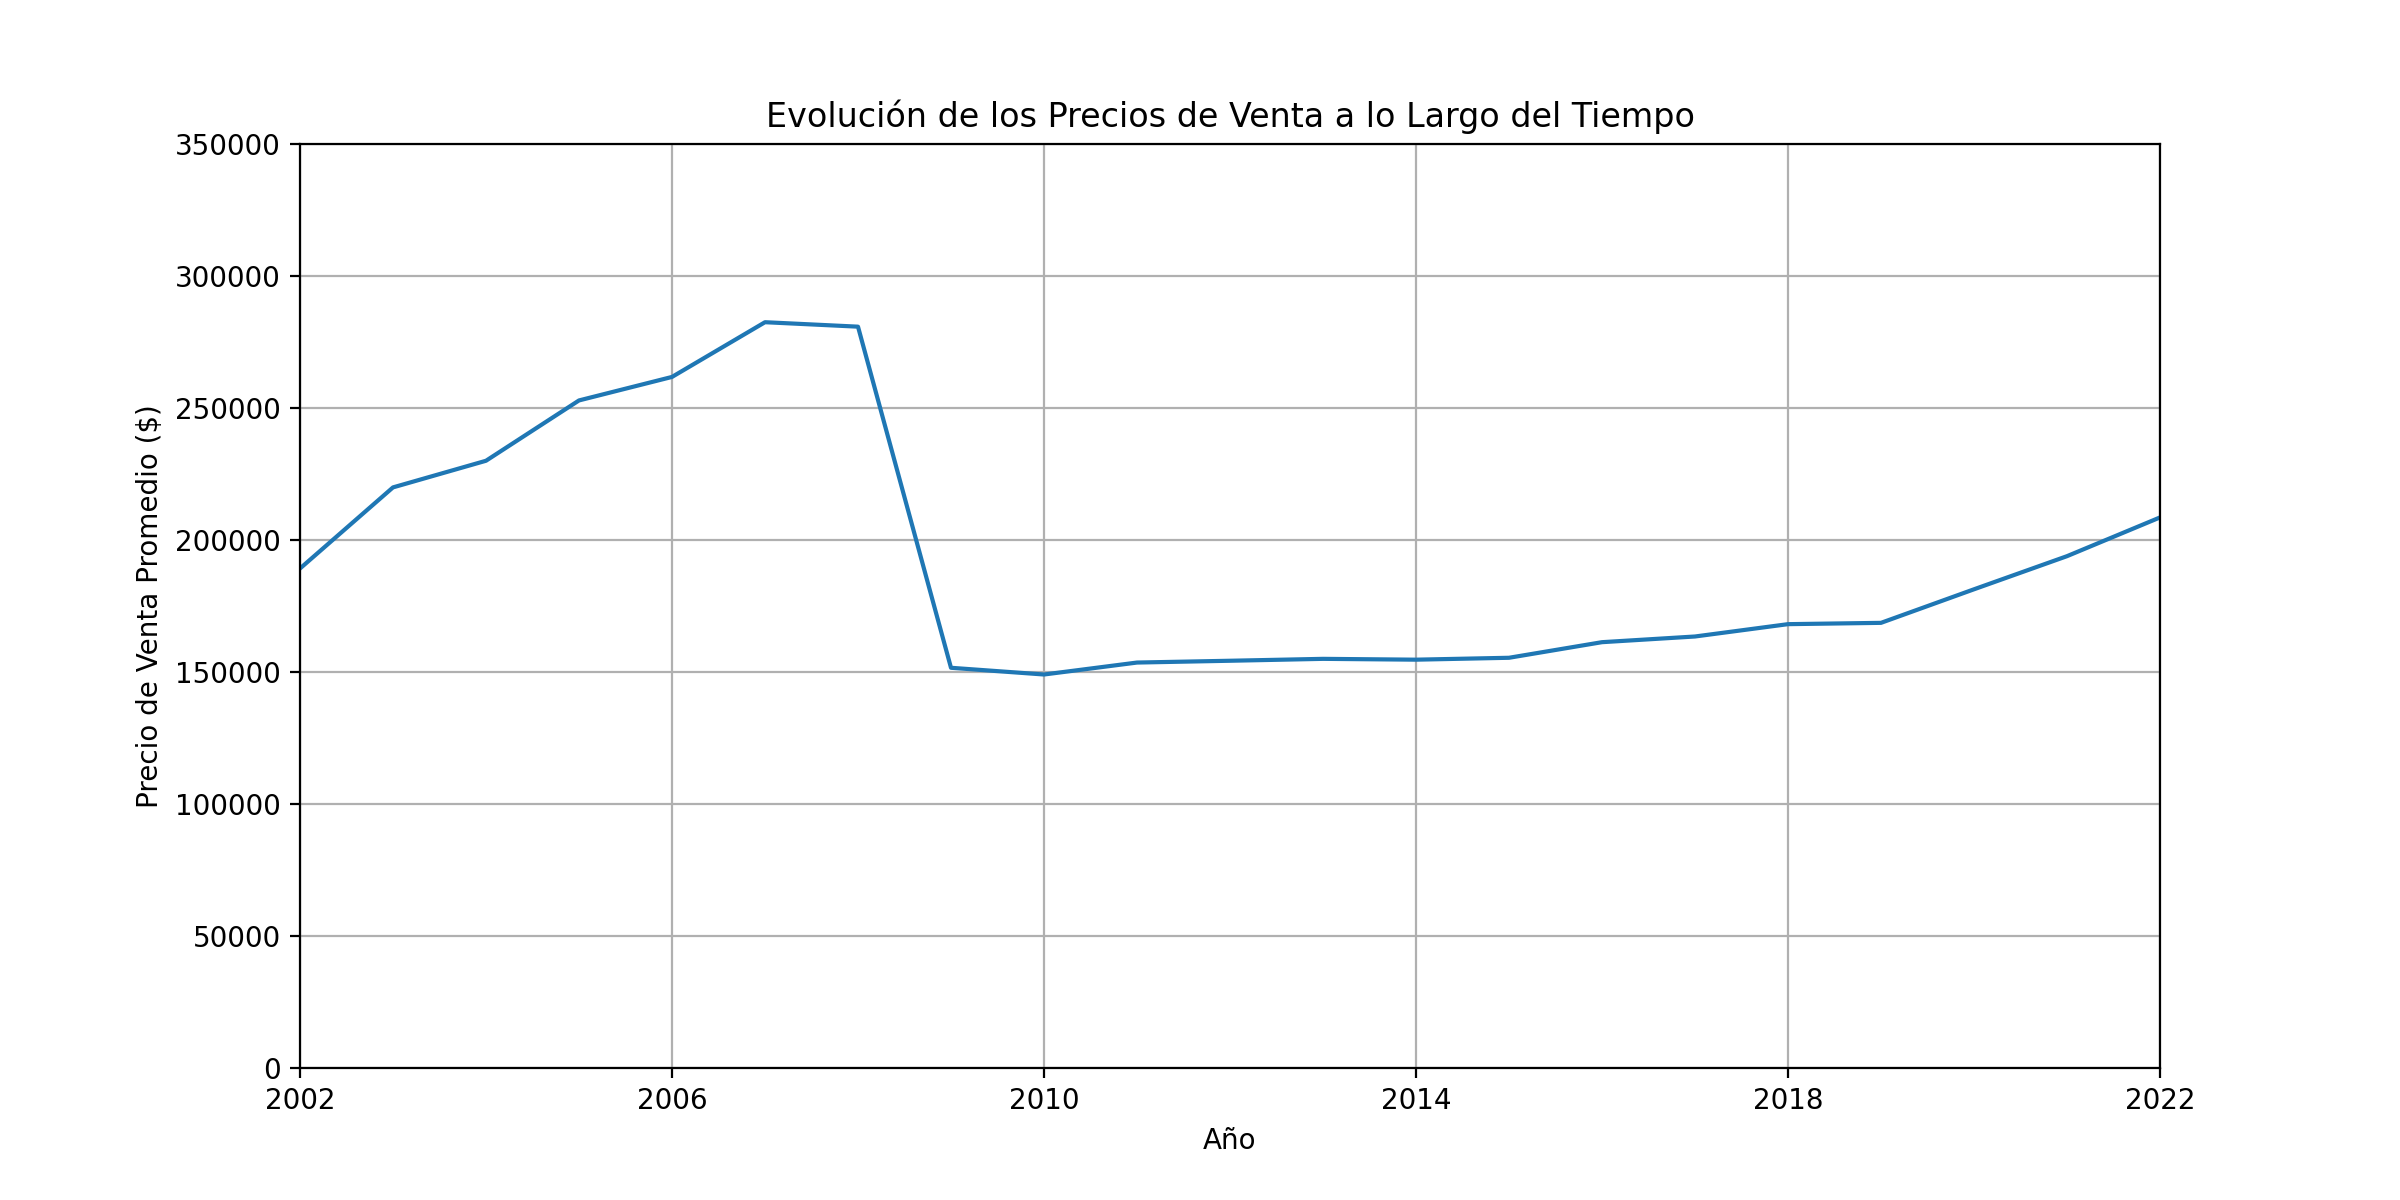

In [14]:

propiedades['sale_date'] = pd.to_datetime(propiedades['sale_date'], errors='coerce')

propiedades['year_sold'] = propiedades['sale_date'].dt.year

avg_price_per_year = propiedades.groupby('year_sold')['sale_price'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(avg_price_per_year['year_sold'], avg_price_per_year['sale_price'])
plt.title('Evolución de los Precios de Venta a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Precio de Venta Promedio ($)')
plt.ylim(0, 350000)  
plt.xlim(2002, 2022)  
plt.xticks(ticks=range(2002, 2023, 4))  
plt.grid(True)
plt.show()


In [15]:
propiedades['proptype'].value_counts()

proptype
Residential      45506
Condominium       9039
Commercial        3463
Lg Apartment      1896
Manufacturing       14
Vacant Land          7
Exempt               4
Name: count, dtype: int64

**En el tipo de  propiedad mas frecuente Residential se observa un incremento general en los precios de venta desde el año 2002 hasta 2022.**

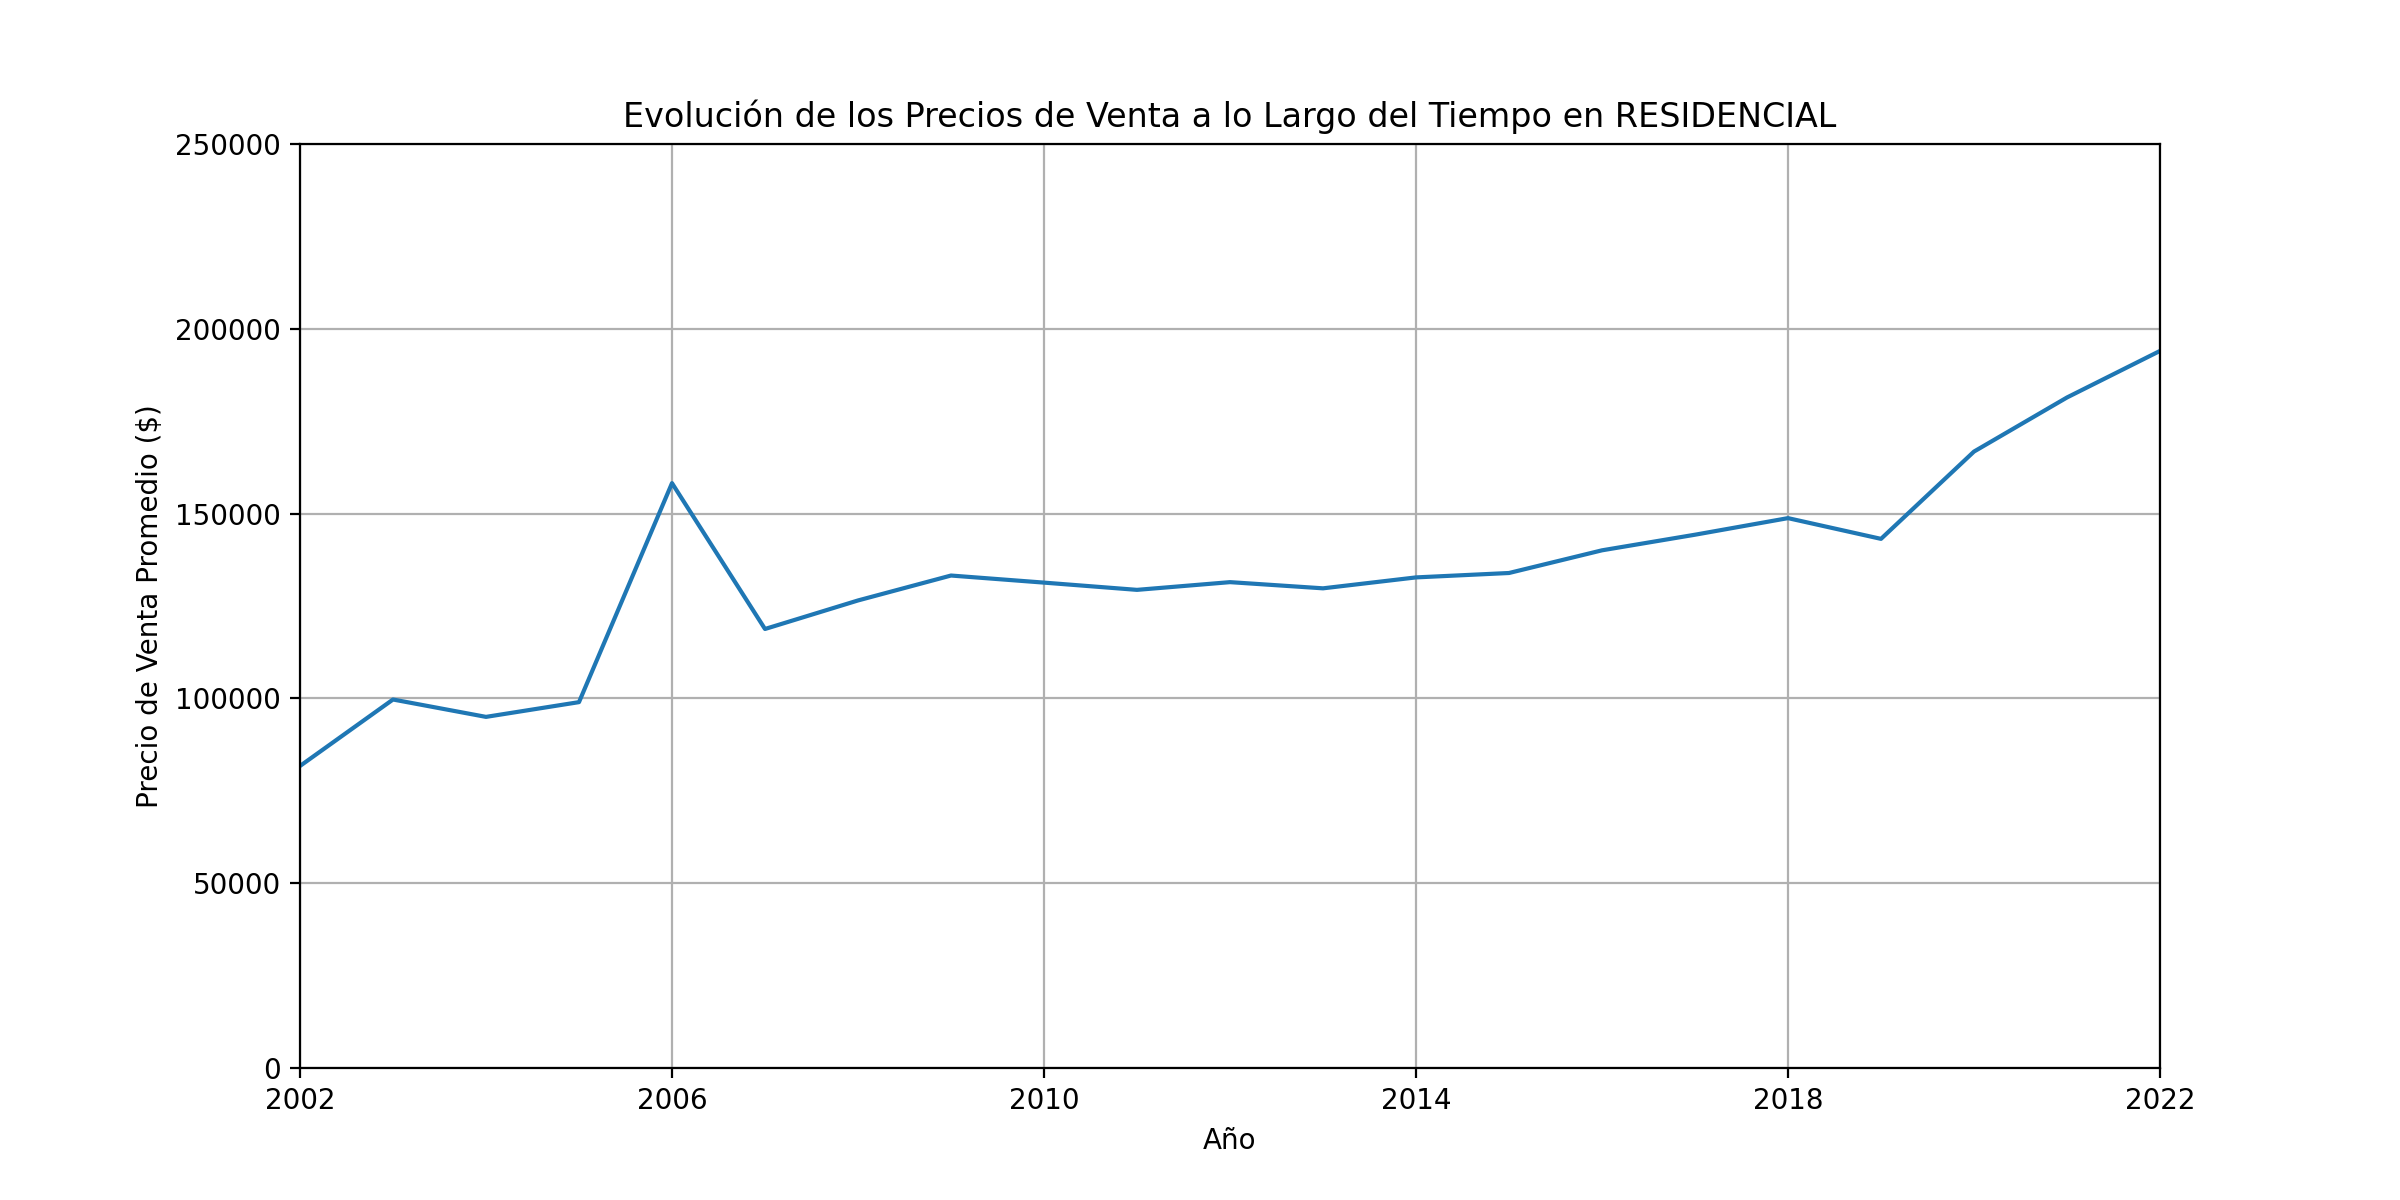

In [16]:

filtered_df = propiedades[propiedades["proptype"] == "Residential"]

avg_price_per_year = filtered_df.groupby('year_sold')['sale_price'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(avg_price_per_year['year_sold'], avg_price_per_year['sale_price'])
plt.title('Evolución de los Precios de Venta a lo Largo del Tiempo en RESIDENCIAL')
plt.xlabel('Año')
plt.ylabel('Precio de Venta Promedio ($)')
plt.ylim(0, 250000)  
plt.xlim(2002, 2022)  
plt.xticks(ticks=range(2002, 2023, 4))  
plt.grid(True)
plt.show()


# **Insight: Presencia de Outliers en los Precios de Venta por Distrito.**

En casi todos los distritos se observan puntos por encima y por debajo de los bigotes, que representan valores atípicos o viviendas con precios significativamente más altos o más bajos en comparación con el resto. Estos outliers pueden reflejar propiedades excepcionalmente caras, como viviendas de lujo, o propiedades inusualmente económicas, como aquellas en condiciones deterioradas. Analizar estos valores atípicos es clave para comprender tanto los extremos del mercado inmobiliario como para ajustar los modelos predictivos de manera que capturen adecuadamente este comportamiento inusual sin comprometer la precisión general.

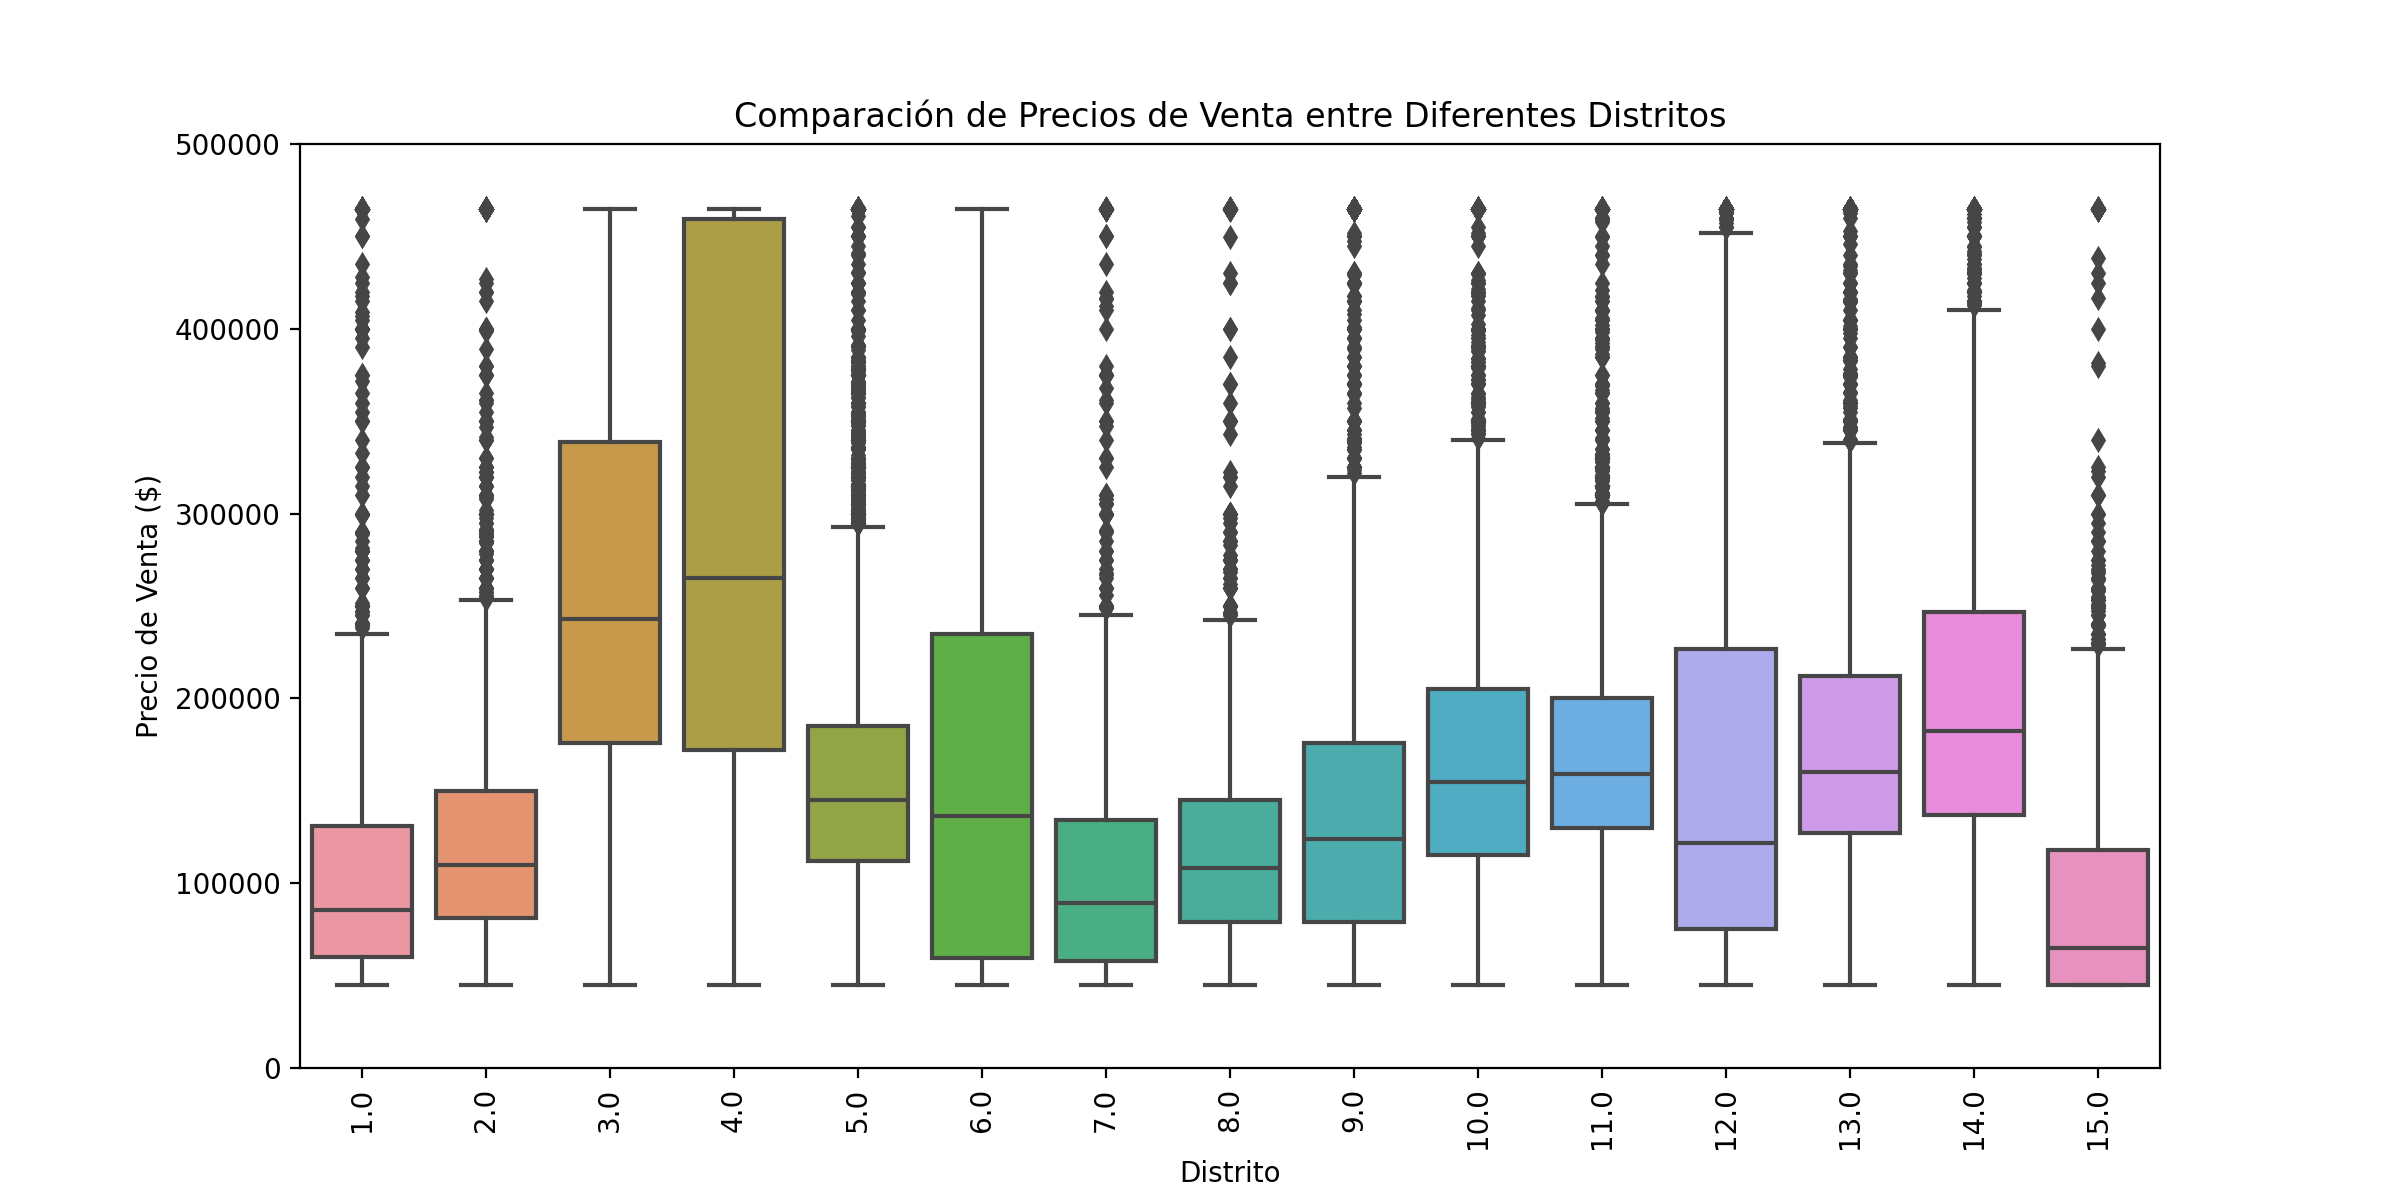

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='district', y='sale_price', data=propiedades)
plt.title('Comparación de Precios de Venta entre Diferentes Distritos')
plt.xlabel('Distrito')
plt.ylabel('Precio de Venta ($)')
plt.xticks(rotation=90)
plt.ylim(0, 500000)  
plt.show()

In [18]:
propiedades['price_per_sqft'] = propiedades['sale_price'] / propiedades['finishedsqft']
altura_maxima_distrito = propiedades.groupby('district')['stories'].max().reset_index()


C:\Users\ankel\AppData\Local\Temp\ipykernel_17784\214171732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# **Insight: Comparación de precios de venta entre diferentes distritos.**

**En el siguiente grafcio vemos que la línea roja con marcadores muestra la altura máxima de las edificaciones en cada distrito y  las barras el Precio por Pie Cuadrado.**




Podemos destacar que:
- **El distrito 4 tiene la edificación más alta con aproximadamente 25 pisos y el precio por pie cuadradro más alto, lo que sugiere que     puede ser un distrito de oficinas corporativas**
- **Los distrito 11 y 13 en cambio destacan porque el precio por pie cuadrado es elevado pero la altura maxima de la edificación   es muy inferior, luego podriamos sugerir que se trata distritos de propiedades residenciales de alto valor.**


C:\Users\ankel\AppData\Local\Temp\ipykernel_17784\3202375565.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


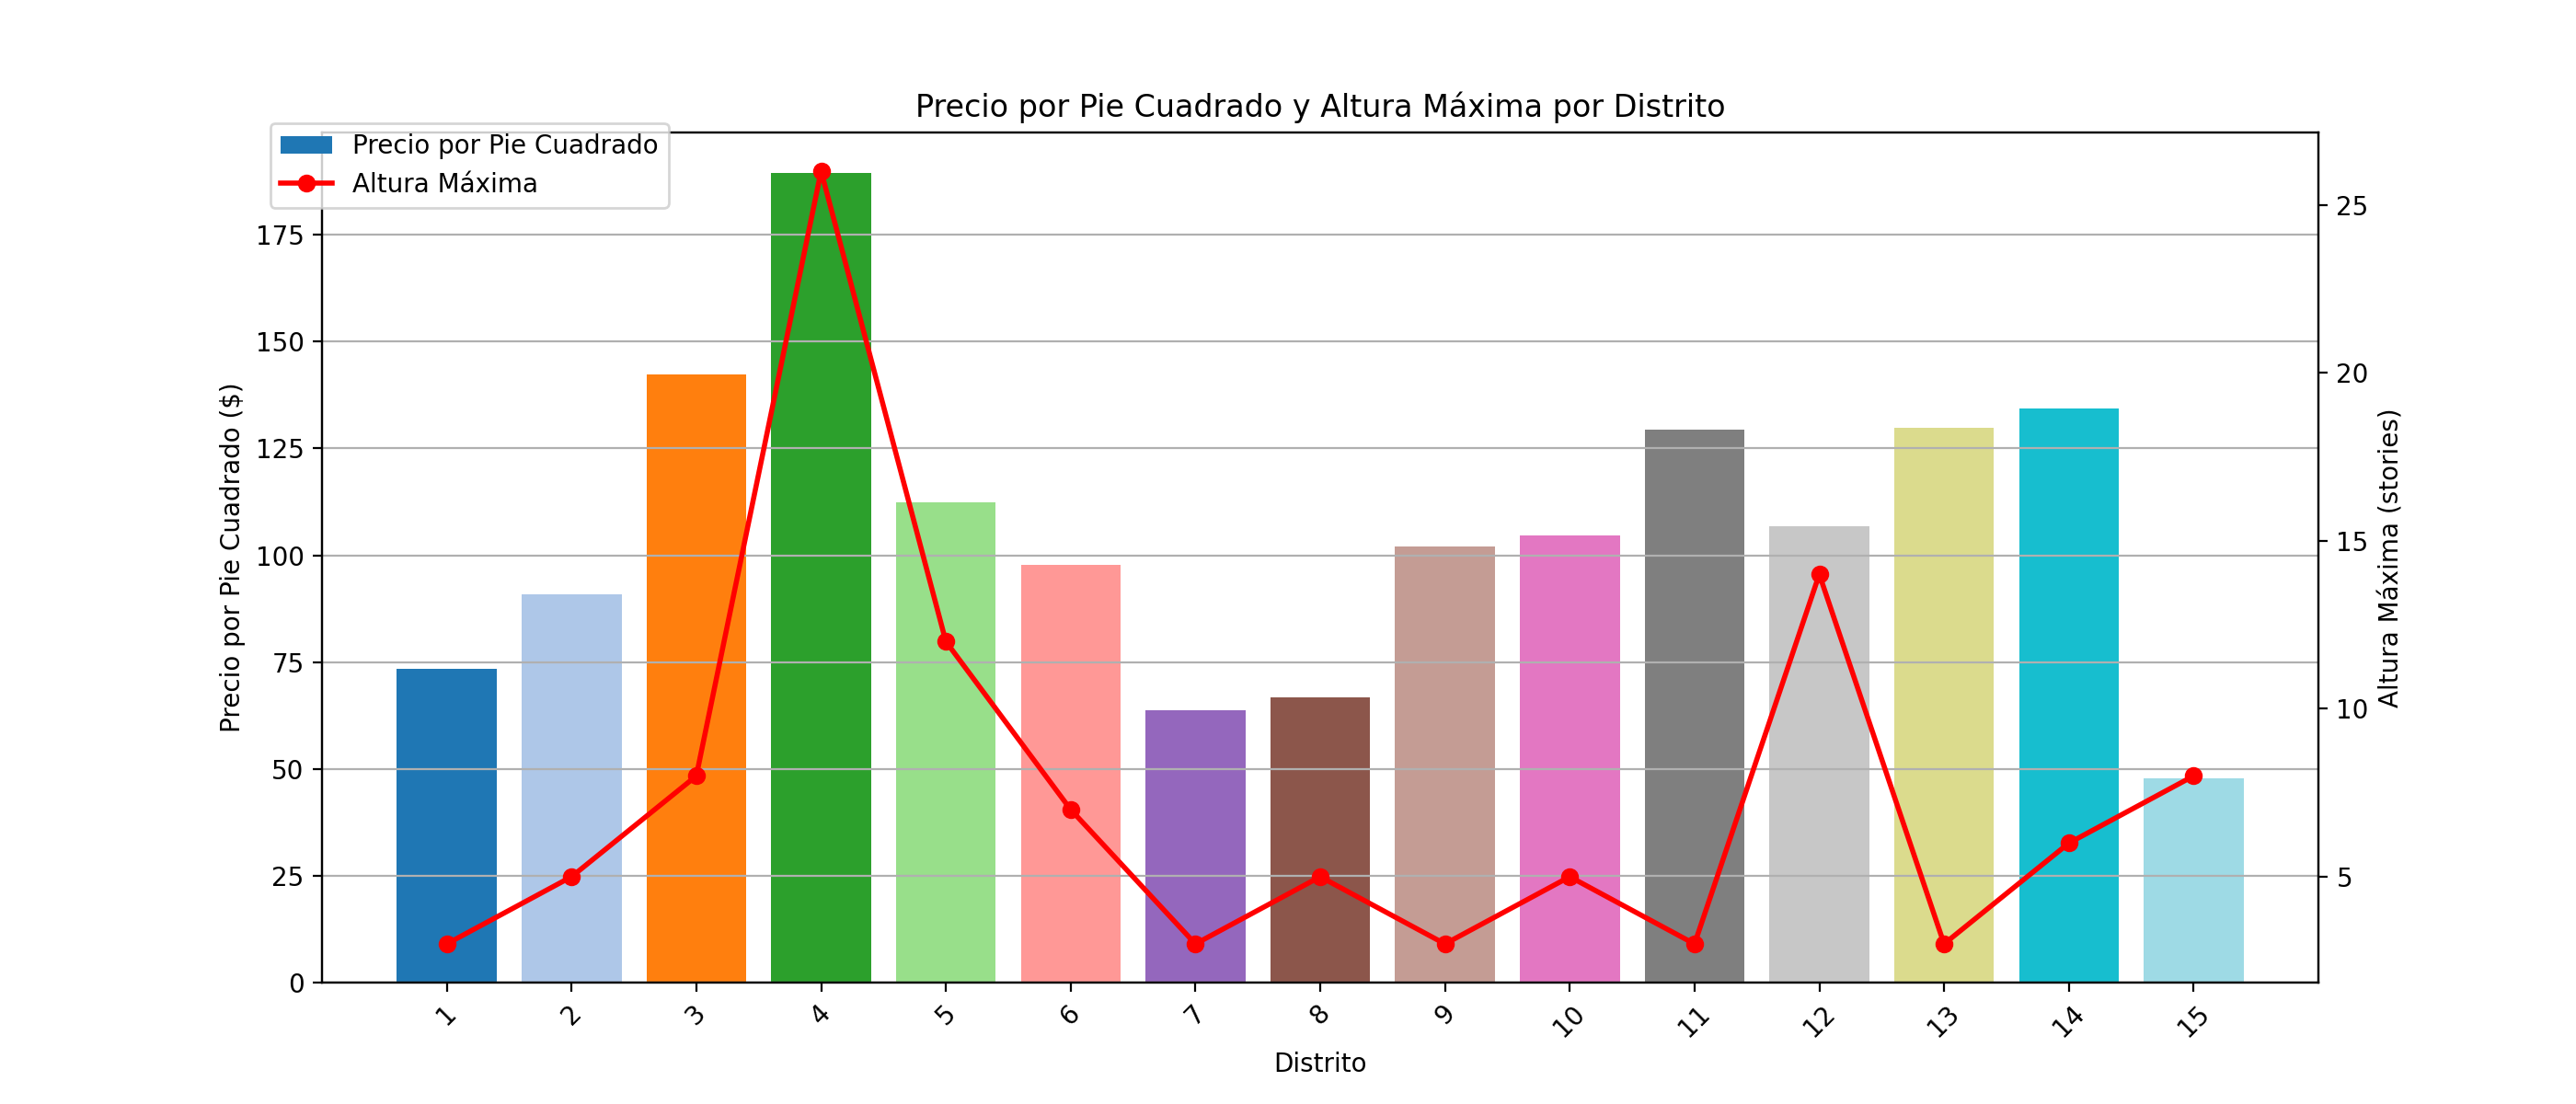

In [19]:
precio_por_pie_cuadrado = propiedades.groupby('district')['price_per_sqft'].mean().reset_index()
fig, ax1 = plt.subplots(figsize=(14, 6))
colors = plt.cm.get_cmap('tab20', len(propiedades['district'].unique()))

ax1.bar(precio_por_pie_cuadrado['district'], precio_por_pie_cuadrado['price_per_sqft'], color=colors.colors, label='Precio por Pie Cuadrado')
ax1.set_xlabel('Distrito')
ax1.set_ylabel('Precio por Pie Cuadrado ($)')
ax1.set_title('Precio por Pie Cuadrado y Altura Máxima por Distrito')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y')

ax2 = ax1.twinx()
ax2.plot(altura_maxima_distrito['district'], altura_maxima_distrito['stories'], color='red', marker='o', linestyle='-', linewidth=2, label='Altura Máxima')
ax2.set_ylabel('Altura Máxima (stories)')
ax2.tick_params(axis='y')

ax1.set_xticks(precio_por_pie_cuadrado['district'])
ax1.set_xlim(0, 16)

fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

In [20]:
propiedades.shape

(59929, 20)